# Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Get Data and Understand

In [2]:
df = pd.read_csv('loan_data.csv')

In [28]:
df.head()
# Our Target Variable is ['Not.Fully.Paid']

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
print(df['not.fully.paid'].value_counts())
print('\n')
print('Percentage of paying people = ', 1533/8045)

# We can see that the population of data contains only 19 percent of the people paying the loan back.
# This refers to carefully sample and use boosting, bagging and random forest model but try all of them and compare the res

0    8045
1    1533
Name: not.fully.paid, dtype: int64


Percentage of paying people =  0.19055313859540088


In [5]:
df.info() # There is no missing values and all the data types are in corerect format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# 2.Exploratory Data Analysis

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

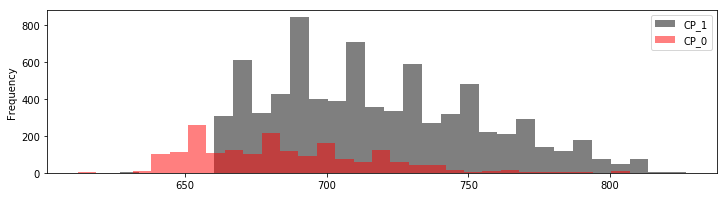

In [7]:
# histogram of credit.policy VS fico
plt.figure(figsize=(12,3))
df[df['credit.policy']==1]['fico'].plot.hist(bins=30, alpha=0.5, color='black', label='CP_1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30, alpha=0.5, color='red', label='CP_0')
plt.legend()

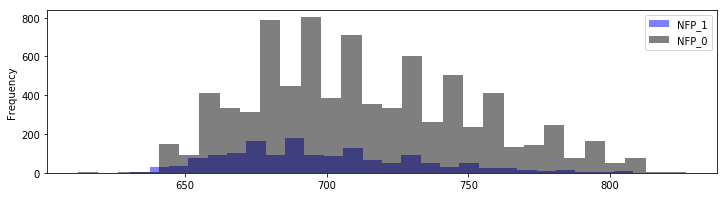

In [8]:
# histogram of Not.fully.Paid VS fico
plt.figure(figsize=(12,3))
df[df['not.fully.paid']==1]['fico'].plot.hist(bins=30, alpha=0.5, color='blue', label='NFP_1')
df[df['not.fully.paid']==0]['fico'].plot.hist(bins=30, alpha=0.5, color='black', label='NFP_0')
plt.legend()

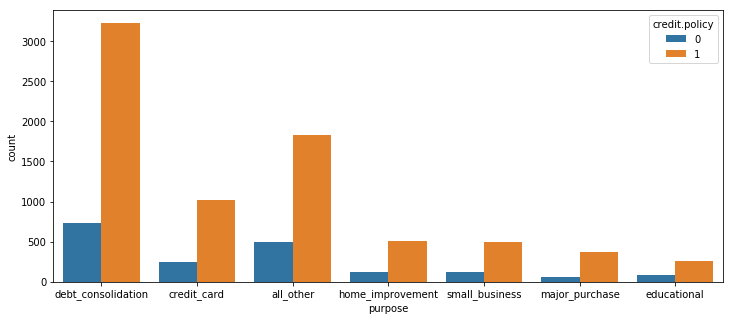

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x= df['purpose'], hue=df['credit.policy'])
# Count of all the pupose having credit policy

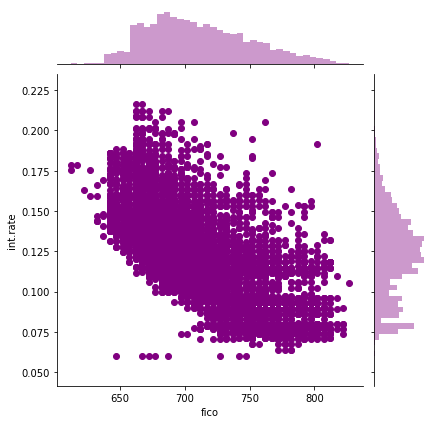

In [10]:
sns.jointplot(x=df['fico'],y=df['int.rate'], color='purple')
# Trend Between fico and interest rate

<Figure size 792x504 with 0 Axes>

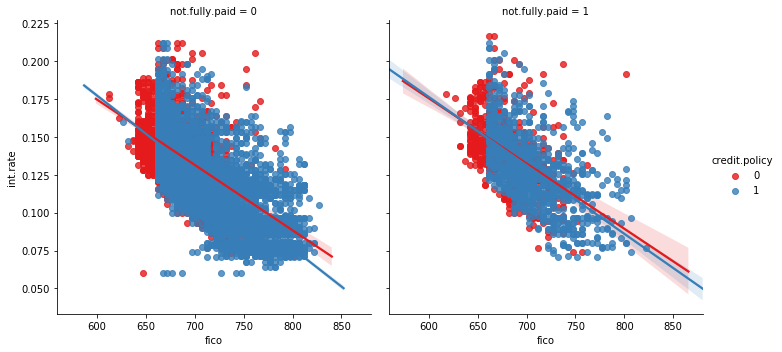

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate', data=df, col='not.fully.paid', hue='credit.policy', palette='Set1')

# 3. Target is Categorical Variable so Let Create dummy variables

In [12]:
df1 = pd.get_dummies(data = df, columns = ['purpose'], drop_first=True )
df1.head(1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0


# 4. Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df1.drop(labels = 'not.fully.paid', axis=1)
y = df1['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# 5. Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
prediction_DT = dtree.predict(x_test)

# 6. Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
rftree1 = RandomForestClassifier(n_estimators=200,criterion="entropy")
rftree2 = RandomForestClassifier(n_estimators=200)

In [19]:
rftree1.fit(x_train, y_train)
rftree2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfpred1 = rftree1.predict(x_test)
rfpred2 = rftree2.predict(x_test)

# 7. Bagging Classifier

In [21]:
from sklearn.ensemble import BaggingClassifier
bgtree = BaggingClassifier(n_estimators=200)

In [22]:
bgtree.fit(x_train, y_train)
prediction_BC = bgtree.predict(x_test)

# 8. Boosting Tree

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbctree = GradientBoostingClassifier(n_estimators=200)

In [24]:
gbctree.fit(x_train, y_train)
prediction_GBC = gbctree.predict(x_test)

# 9. Prediction and Evaluation of All tree

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
x = [prediction_DT, prediction_GBC, prediction_BC, rfpred1, rfpred2]

In [27]:
for i in x:
    print(classification_report(y_test,i))
    print('\n')
    print(confusion_matrix(y_test,i))
    print('\n')
    print(accuracy_score(y_test, i))
    print('\n')

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3237
           1       0.21      0.24      0.22       595

   micro avg       0.74      0.74      0.74      3832
   macro avg       0.53      0.54      0.54      3832
weighted avg       0.76      0.74      0.75      3832



[[2703  534]
 [ 452  143]]


0.7426931106471816


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3237
           1       0.36      0.06      0.10       595

   micro avg       0.84      0.84      0.84      3832
   macro avg       0.61      0.52      0.50      3832
weighted avg       0.77      0.84      0.78      3832



[[3177   60]
 [ 561   34]]


0.8379436325678496


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3237
           1       0.37      0.04      0.07       595

   micro avg       0.84      0.84      0.84      3832
   macro avg       0.61 